<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


304.2041705571118


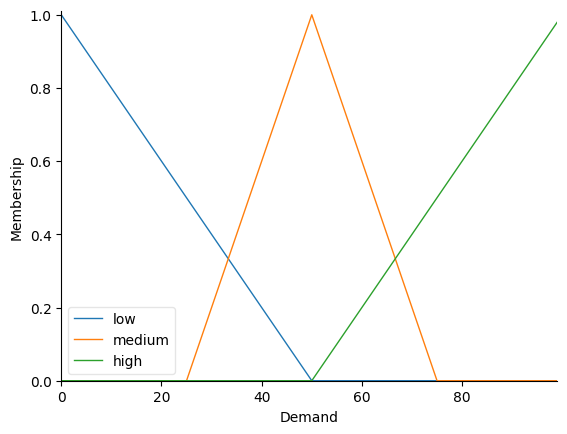

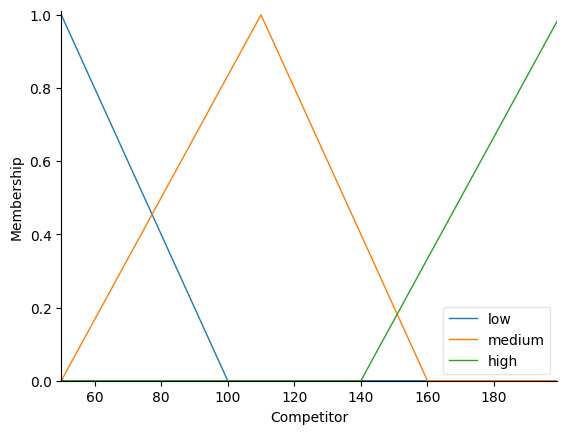

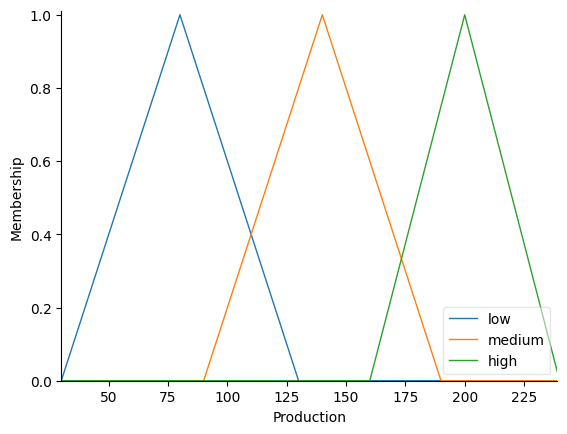

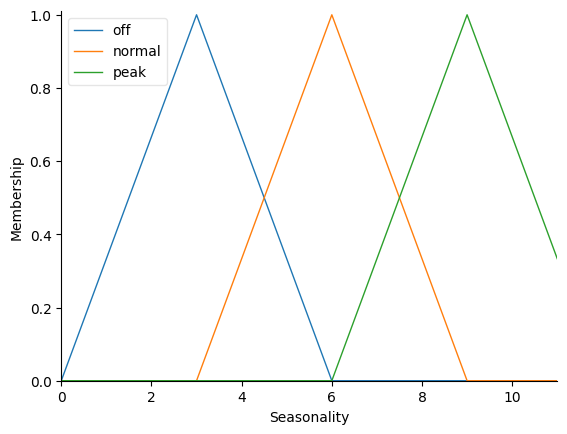

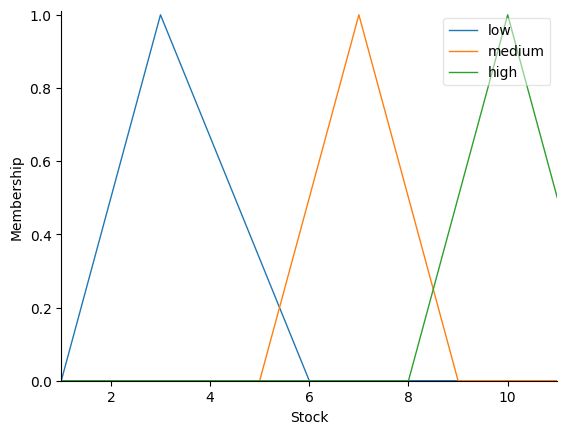

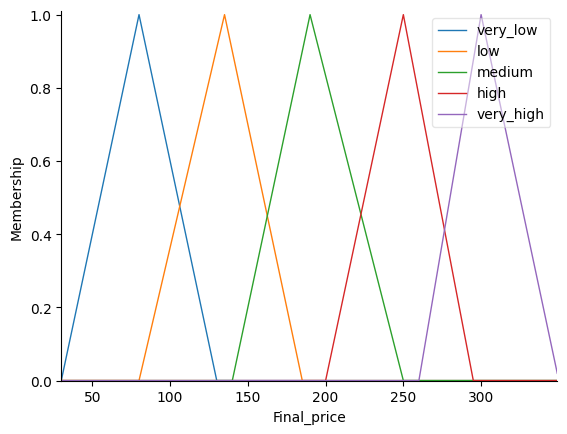

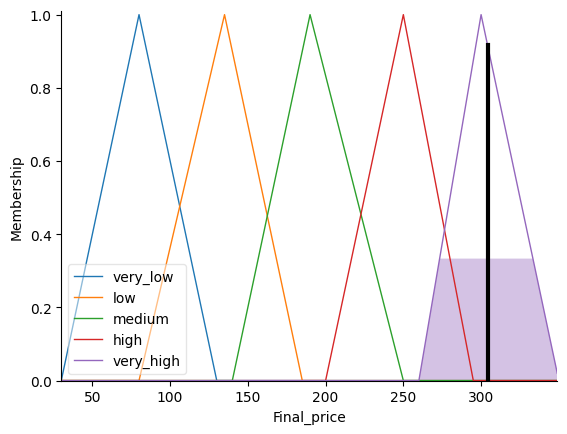

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Demand=ctrl.Antecedent(np.arange(0,100,1),'Demand')
Competitor=ctrl.Antecedent(np.arange(50,200,1),'Competitor')
Production=ctrl.Antecedent(np.arange(30,240,1),'Production')
Seasonality=ctrl.Antecedent(np.arange(0,12,1),'Seasonality')
Stock=ctrl.Antecedent(np.arange(1,12,1),'Stock')

Final_price=ctrl.Consequent(np.arange(30,350,1),'Final_price')

Demand['low']=fuzz.trimf(Demand.universe,[0,0,50])
Demand['medium']=fuzz.trimf(Demand.universe,[25,50,75])
Demand['high']=fuzz.trimf(Demand.universe,[50,100,100])

Competitor['low']=fuzz.trimf(Competitor.universe,[0,50,100])
Competitor['medium']=fuzz.trimf(Competitor.universe,[50,110,160])
Competitor['high']=fuzz.trimf(Competitor.universe,[140,200,200])

Production['low']=fuzz.trimf(Production.universe,[30,80,130])
Production['medium']=fuzz.trimf(Production.universe,[90,140,190])
Production['high']=fuzz.trimf(Production.universe,[160,200,240])

Seasonality['off']=fuzz.trimf(Seasonality.universe,[0,3,6])
Seasonality['normal']=fuzz.trimf(Seasonality.universe,[3,6,9])
Seasonality['peak']=fuzz.trimf(Seasonality.universe,[6,9,12])

Stock['low']=fuzz.trimf(Stock.universe,[1,3,6])
Stock['medium']=fuzz.trimf(Stock.universe,[5,7,9])
Stock['high']=fuzz.trimf(Stock.universe,[8,10,12])

Final_price['very_low']=fuzz.trimf(Final_price.universe,[30,80,130])
Final_price['low']=fuzz.trimf(Final_price.universe,[80,135,185])
Final_price['medium']=fuzz.trimf(Final_price.universe,[140,190,250])
Final_price['high']=fuzz.trimf(Final_price.universe,[200,250,295])
Final_price['very_high']=fuzz.trimf(Final_price.universe,[260,300,350])

# gia rat cao
rule1=ctrl.Rule(Demand['high']&Competitor['high']&Stock['low'],Final_price['very_high'])
rule2=ctrl.Rule(Demand['high']&Seasonality['peak']&Stock['low'],Final_price['very_high'])
rule3=ctrl.Rule(Demand['medium']&Production['high']&Stock['low'],Final_price['very_high'])

# gia cao
rule4=ctrl.Rule(Demand['high']&Competitor['medium']&Stock['medium'],Final_price['high'])
rule5=ctrl.Rule(Demand['medium']&Competitor['high']&Stock['low'],Final_price['high'])
rule6=ctrl.Rule(Demand['medium']&Seasonality['peak']&Stock['medium'],Final_price['high'])

# gia trung binh
rule7=ctrl.Rule(Demand['medium']&Competitor['medium']&Stock['medium'],Final_price['medium'])
rule8=ctrl.Rule(Demand['low']&Competitor['high']&Stock['medium'],Final_price['medium'])
rule9=ctrl.Rule(Demand['medium']&Production['medium']&Stock['medium'],Final_price['medium'])

# gia thap
rule10=ctrl.Rule(Demand['low']&Competitor['low']&Stock['high'],Final_price['low'])
rule11=ctrl.Rule(Demand['medium']&Production['low']&Stock['high'],Final_price['low'])
rule12=ctrl.Rule(Demand['low']&Seasonality['off']&Stock['high'],Final_price['low'])

# gia rat thap ( giam gia)
rule13=ctrl.Rule(Demand['low']&Competitor['low']&Stock['high'],Final_price['very_low'])
rule14=ctrl.Rule(Demand['low']&Seasonality['off']&Stock['high'],Final_price['very_low'])
rule15=ctrl.Rule(Demand['medium']&Competitor['low']&Stock['high'],Final_price['very_low'])


Demand.view()
Competitor.view()
Production.view()
Seasonality.view()
Stock.view()
Final_price.view()

Final_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
Final_price_sim=ctrl.ControlSystemSimulation(Final_ctrl)
Final_price_sim.input['Demand']=40
Final_price_sim.input['Competitor']=99
Final_price_sim.input['Production']=187
Final_price_sim.input['Seasonality']=8
Final_price_sim.input['Stock']=5
Final_price_sim.compute()
print(Final_price_sim.output['Final_price'])
Final_price.view(sim=Final_price_sim)